There are a few useful terms to remember when describing the configuration of electrons around an atom...

- __`shells`:__ Electrons w/ a shared principal quantum number<br>
- __`subshells`:__ Electrons w/ a shared shell and angular momentum quantum number<br>
- __`orbitals`:__ Electrons w/ a shared shell, subshell, and magnetic quantum number

Each orbital can hold two electrons due to the **<a href="https://en.wikipedia.org/wiki/Pauli_exclusion_principle" target="_blank">Pauli exclusion principle</a>**, meaning we can reliably calculate how many electrons a given subshell/shell can hold! However, electrons will fill up each orbital/subshell/shell in a very particular way.

## **What is an Aufbau Diagram?**
To understand this filling order, we need to understand the **<a href="https://chem.libretexts.org/Bookshelves/Introductory_Chemistry/Introductory_Chemistry_(CK-12)/05%3A_Electrons_in_Atoms/5.15%3A_Aufbau_Principle" target="_blank">Aufbau principle</a>**. In particular, the "diagonal rule," which describes how electrons will fill each subshell in an atom's ground-state configuration. Start from the bottom left (at the "1s") and follow the arrow to the left. Then, start back up at the next highest arrow. This visual trick allows us to predict how electrons sort into each subshell.

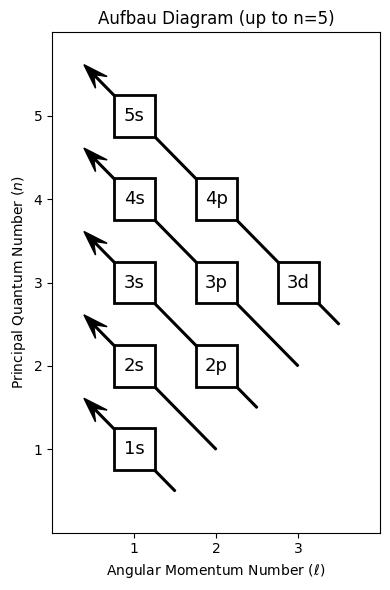

In [7]:
import ASDtools as asdt

asdt.draw_aufbau_diagram(N_max=5)

Notice how some subshells with a higher _n_ sometimes fill before subshells of a lower _n_ (i.e., 4s fills before 3d). These subshells (despite having a larger _n_) have a lower associated energy. Electrons will always fill the lowest-energy subshell, regardless of the principal quantum number! Finding the exact energies of each subshell is tricky, and **<a href="https://en.wikipedia.org/wiki/Energy_level" target="_blank">analytical solutions are only known for the lightest of elements</a>**.

## **Electron Configuration**

From the above Aufbau diagram, we are able to predict the order that electrons fill into each subshell. Note that there are **<a href="https://chemistrytalk.org/aufbau-principle/#:~:text=Copper%2C%20silver%2C%20and%20gold%20(,molybdenum%2C%20rhodium%2C%20and%20platinum" target="_blank">exceptions to the Aufbau principle</a>** where electrons fill in an order the above diagram cannot predict. These exceptions are not currently accounted for in __ASDtools__.

In [23]:
asdt.find_filling_order(max_level=5, joined=True)

'1s.2s.2p.3s.3p.4s.3d.4p.5s'

What if we wanted to know the ground-state electronic configuration of a given element and ionization? To do this, we need to know the total number of available electrons how many electrons can fill into each subshell. The first of these two is simple to calculate...

\begin{equation}
(\textrm{# of available electrons}) = (\textrm{# of protons}) - (\textrm{# of ionized electrons})
\end{equation}

The electron capacity of each subshell is also fairly straightforward. Each subsequent subshell has two additional orbitals. So...

<center>
    
| Orbital | Total Orbitals | Total e |
| :-: | :-: | :-: |
| s | 1 | 2 |
| p | 3 | 6 |
| d | 5 | 10 |
| f | 7 | 14 |
| $$\vdots$$ | $$\vdots$$ | $$\vdots$$ |

</center>

The following function uses this logic to convert elements (with formatting identical to the NIST ASD's) into a ground-state configuration. Note, this function allows for **<a href="https://preparatorychemistry.com/Bishop_abbreviated_electron_configurations_help.htm" target="_blank">abbreviated notation</a>** and two different sorting schemes ("fill order" and "principle"). The NIST ASD defaults to "principle" sorting.

In [53]:
asdt.find_electronic_config("O I", abbreviate=True, sortby="fill order")

'[He]2s2.2p4'

There are situations where it may be helpful to tell whether a given subshell is filled or not. The following function takes a subshell string and determines whether it is at capacity.

In [70]:
subshell_one = "2p3"
subshell_two = "2p6"

print(f"Subshell '{subshell_one}' is filled: {asdt.is_subshell_filled(subshell_one)}")
print(f"Subshell '{subshell_two}' is filled: {asdt.is_subshell_filled(subshell_two)}")

Subshell '2p3' is filled: False
Subshell '2p6' is filled: True


If we look at the ASD's electronic configurations for heavy elements, there appears to be an odd format that doesn't follow the conventions laid out above. Take the following configuration data for "Ni I," for example. In addition to traditional subshells, there are terms contained within parentheses. These relate to another way of describing atoms: **term symbols**.

In [77]:
import numpy as np

lines = asdt.NIST_lines(["Ni I"], keep_flag_columns=True, update=False)
np.unique(lines.df["Lower level"])[:10]

array(['3d10                 | 1S   | 0',
       '3d8.(1D).4s.4p.(3P*) | 3F*  | 3',
       '3d8.(1D).4s2         | 1D   | 2',
       '3d8.(1G).4s2         | 1G   | 4',
       '3d8.(3F).4s.4p.(1P*) | 3F*  | 4',
       '3d8.(3F).4s.4p.(1P*) | 3G*  | 4',
       '3d8.(3F).4s.4p.(3P*) | 1D*  | 2',
       '3d8.(3F).4s.4p.(3P*) | 1F*  | 3',
       '3d8.(3F).4s.4p.(3P*) | 1G*  | 4',
       '3d8.(3F).4s.4p.(3P*) | 3D*  | 1'], dtype=object)